In [1]:
%run data_preprocessing.ipynb

NotJSONError: Notebook does not appear to be JSON: ''

In [ ]:
#Model Training and Evaluation
def train_and_evalaute_model(model, model_name, monitor_loss=False):
    #Train model
    start = timeit.default_timer()
    model.fit(X_train, y_train)
    stop = timeit.default_timer()

    #Predict on the test set
    y_pred = model.predict(X_test)

    #Evaluate the model
    model_results = pd.DataFrame([{
        'Model': model_name,
        'Runtime': stop - start,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted'),
        'Recall': recall_score(y_test, y_pred, average='weighted'),
        'F1': f1_score(y_test, y_pred, average='weighted')
    }])
    print(model_results.to_string(index=False))

    #Monitor loss if required
    if monitor_loss and hasattr(model, 'loss_curve_'):
        loss_values = model.loss_curve_
        plt.figure(figsize=(10, 6))
        plt.plot(range(1, len(loss_values) + 1), loss_values, marker='o')
        plt.title('Loss over Epochs for Neural Network')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.grid(True)
        plt.show()

    return model_results


In [ ]:
from sklearn.svm import SVC, NuSVC

#Train an SVM model
svm = SVC()
svm_results = train_and_evalaute_model(svm, 'SVM')

Model  Runtime  Accuracy  Precision  Recall       F1
  SVM 0.002221       0.9   0.900478     0.9 0.899177


         Model  Runtime  Accuracy  Precision   Recall       F1
Neural Network 0.554115  0.833333   0.837104 0.833333 0.834286


c:\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


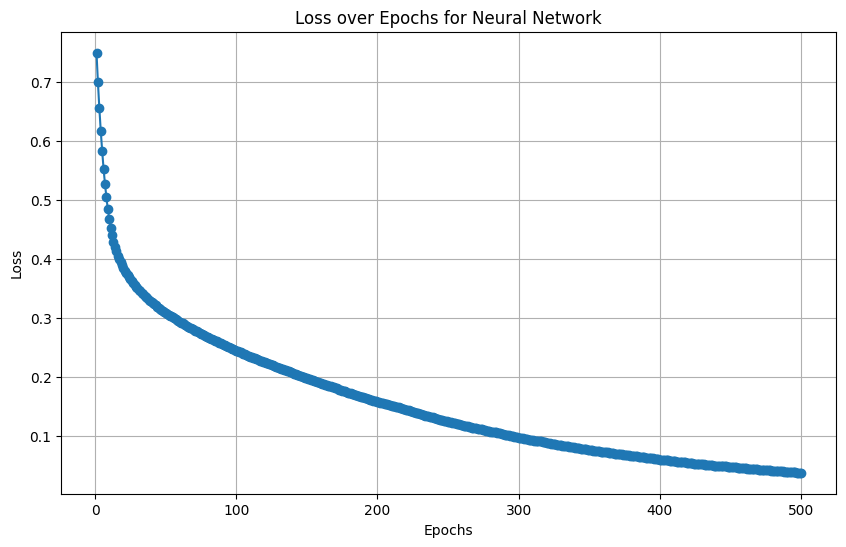

In [ ]:
#Baseline Models:Neural Network
from sklearn.neural_network import MLPClassifier

#Train a Neural Network model
nn = MLPClassifier(random_state=42, max_iter=500)
nn_results = train_and_evalaute_model(nn, 'Neural Network', monitor_loss=True)

In [ ]:
#Baseline Models: Random Forest

from sklearn.ensemble import RandomForestClassifier

#Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf_results = train_and_evalaute_model(rf, 'Random Forest')

        Model  Runtime  Accuracy  Precision   Recall       F1
Random Forest 0.098462  0.833333   0.833333 0.833333 0.833333


In [ ]:
#Baseline Models: KNN

from sklearn.neighbors import KNeighborsClassifier

#Train a K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn_results = train_and_evalaute_model(knn, 'K-Nearest Neighbors')

              Model  Runtime  Accuracy  Precision   Recall       F1
K-Nearest Neighbors  0.00058  0.916667   0.916569 0.916667 0.916351


              Model  Runtime  Accuracy  Precision   Recall       F1
                SVM 0.002221  0.900000   0.900478 0.900000 0.899177
     Neural Network 0.554115  0.833333   0.837104 0.833333 0.834286
      Random Forest 0.098462  0.833333   0.833333 0.833333 0.833333
K-Nearest Neighbors 0.000580  0.916667   0.916569 0.916667 0.916351


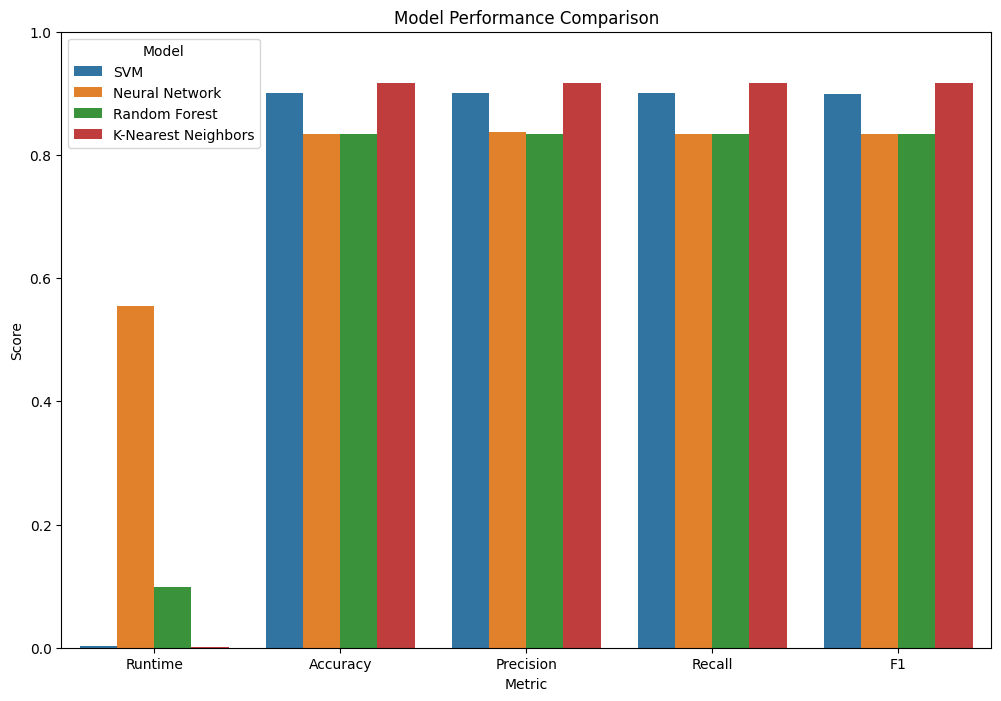

In [ ]:
#Summarize the performance of all models
performance = pd.concat([svm_results, nn_results, rf_results, knn_results], ignore_index=True)

#Print the performance DataFrame
print(performance.to_string(index=False))

#Pivot the DataFrame to have metrics as rows and models as columns
performance_pivot = performance.melt(id_vars='Model', var_name='Metric', value_name='Score')

#Plot the performance metrics for comparison
plt.figure(figsize=(12, 8))
sns.barplot(x='Metric', y='Score', hue='Model', data=performance_pivot)
plt.ylim(0, 1)  # Adjust the y-axis limits to reduce vertical space
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()
